In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os import listdir
import os
import sys
sys.path.insert(0, os.path.abspath('..')) # Note that this line is useless with a regular pip installation of PyWST.
import pywst as pw
%matplotlib inline

In [2]:
plt_dir ='/Users/ianhothi/Dropbox/WST_RWST/Figures/lightcone_test/'
ddir = '/Users/ianhothi/WST/Testing/pywst/examples/data/'

In [3]:
lc = fits.getdata(ddir+'fx_0.1_RHS=0.5_fa_0.5_x_lightcone_dtb_fullres.fits')

In [4]:
lc.shape

(2048, 256, 256)

In [5]:
M, N = 256,256 # Height and width of the test maps
J = 8 # We choose to probe 7 scales
L = 8 # Number of angles in which the interval [0,pi] is divided
OS = 0 # No oversampling

In [6]:
wst_op = pw.WSTOp(M, N, J, L, OS)

In [7]:
C = wst_op.apply(lc[1])

/Users/ianhothi/anaconda3/envs/pywst/lib/python3.7/site-packages/pywst/wst_operator.py:167: UserWarning: Warning! Swapping byte order of input data to avoid FFT error.
  warnings.warn("Warning! Swapping byte order of input data to avoid FFT error.")


In [8]:
np.array(C.get_coeffs())[1].shape

/Users/ianhothi/anaconda3/envs/pywst/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


(5, 1857)

In [9]:
S0s,_ = C.get_coeffs(layer=0)

In [10]:
S1s,_ = C.get_coeffs(layer=1)

In [11]:
S2s,_ = C.get_coeffs(layer=2)

In [12]:
S2s.shape

(1792,)

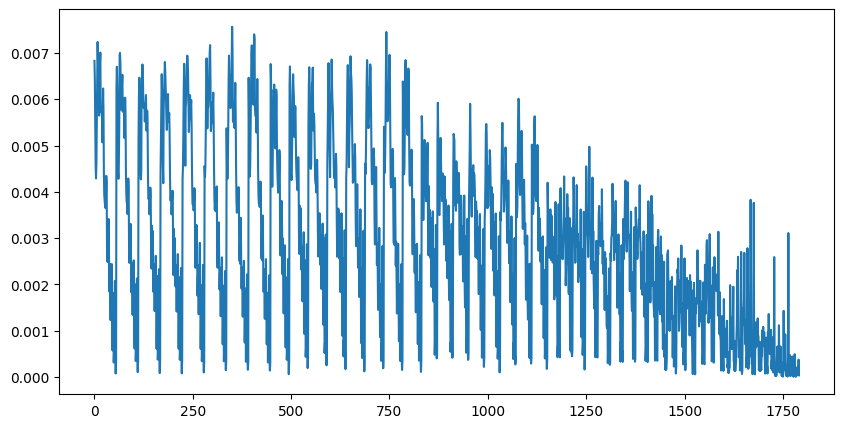

In [13]:
plt.figure(figsize=(10,5))
plt.plot(S2s)


In [14]:
j1_0_coeffs,_ = C.get_coeffs(layer=2,j1 = 0)



In [21]:
def get_s21(wst_object):
    import pywst as pw
    import numpy as np
    import matplotlib.pyplot as plt
    J = wst_object.J
    L = wst_object.L
    def get_coeffs_full(wst_object, J,L,Layer):
        def chunks(lst, J,L,Layer):
            Final = []
            if Layer == 1:
                Final = np.array([np.mean(lst[i:i + L]) for i in range(0, len(lst), L)])
            if Layer == 2:
                Final_to_Average = np.array([lst[i:i + J] for i in range(0, len(lst), J)])
                Final = np.array([np.mean(Final_to_Average[i:i + L]) for i in range(0, len(Final_to_Average), L)])
                
                
            return Final

        J1s = []
        for i in range(J):
            Coeffs,_ = wst_object.get_coeffs(layer=Layer,j1 = i)
            print(Coeffs.shape)
            d = chunks(Coeffs,J,L,Layer)
            J1s.append(d) 
        return J1s
    Coeffs_s2 =  get_coeffs_full(C,J,L,2)
    Coeffs_s1 =  get_coeffs_full(C,J,L,1)
    
    Coeffs_s21 = [np.array(Coeffs_s2[i])/Coeffs_s1[i] for i in range(J)]
    fig, axs = plt.subplots(1, len(Coeffs_s21), sharey=True,figsize=(15,5))
    fig.subplots_adjust(wspace=0.07)
    for i in range(len(Coeffs_s21)):
        x = np.arange(J-i)
        axs[i].plot(Coeffs_s21[i])
        axs[i].set_title('$J_{1}$ = '+ np.str(i),fontsize=11)
        axs[i].set_xlabel('$J_{2}$',fontsize=11)
        axs[i].set_xticks(x,fontsize=11)
    
    axs[0].set_ylabel('$S_{2,1}$',fontsize=11)
        
    return Coeffs_s21
    
    

(448,)
(384,)
(320,)
(256,)
(192,)
(128,)
(64,)
(0,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)
(8,)


/Users/ianhothi/anaconda3/envs/pywst/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


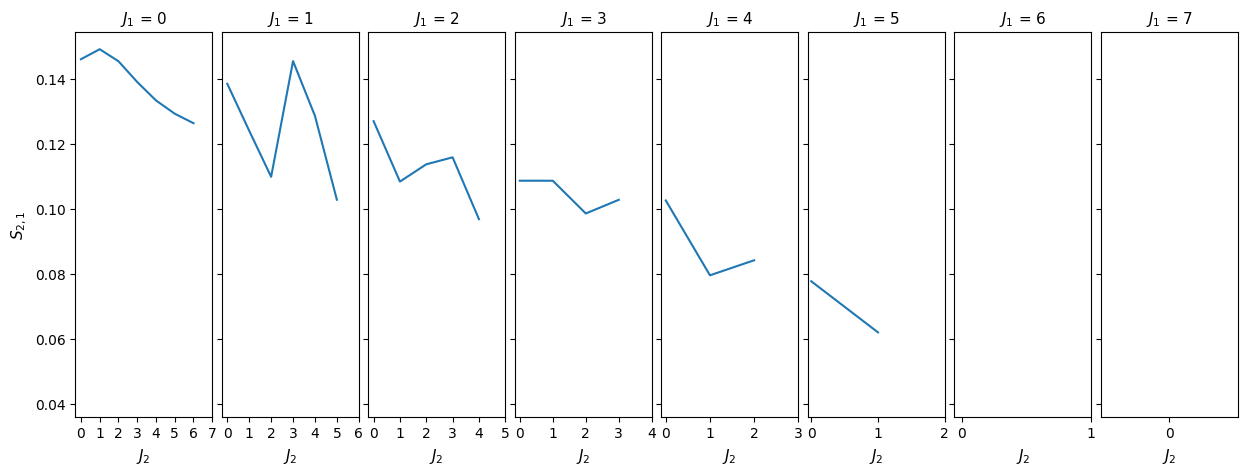

In [22]:
Test = get_s21(C)

In [23]:
D,_=C.get_coeffs(layer=1,j1 = 1)

In [24]:
D.shape

(8,)

In [ ]:
Test[0].shape

In [ ]:
for i in Test:
    print(len(i))

In [ ]:
len(Test)

In [ ]:
fig, axs = plt.subplots(1, len(Test), sharey=True,figsize=(15,5))
fig.subplots_adjust(wspace=0.08)
for i in range(len(Test)):
    x = np.arange(J-i)
    axs[i].plot(Test[i])
    axs[i].set_title('$J_{1}$ = '+ np.str(i),fontsize=15)
    axs[i].set_xlabel('$J_{2}$',fontsize=15)
    axs[i].set_xticks(x,fontsize=15)
    
axs[0].set_ylabel('$S_{2,1}$',fontsize=15)
    

For the share y axis it needs to look something like:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 2.0, 0.01)

s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = s1 * s2

fig, axs = plt.subplots(1, 3, sharey=True)
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0)

# Plot each graph, and manually set the y tick values
axs[0].plot(t, s1)

axs[1].plot(t, s2)

axs[2].plot(t, s3)

plt.show()


In [ ]:
G,_ = C.get_coeffs(layer=2,j1 = 1)
G.shape

In [ ]:
D = np.array([G[i:i + 8] for i in range(0, len(G), 8)]) 

In [ ]:
np.average(D, axis=1).shape

In [ ]:
G[0].shape

In [ ]:
G,_ = C.get_coeffs(layer=2,j1 = 8)

In [ ]:
G

# Anisotropy

In [ ]:
rwst_op = pw.RWSTOp(M, N, J, L, OS)

In [ ]:
C_RWST = rwst_op.apply(lc[1])

In [25]:
C_RWST.plot(names = ['S1Iso','S1Aniso'])

NameError: name 'C_RWST' is not defined

In [ ]:
C_S1Iso = C_RWST.get_coeffs('S1Iso')

In [ ]:
C_S1Aniso = C_RWST.get_coeffs('S1Aniso')

In [ ]:
x = np.arange(J)

In [ ]:
plt.plot(x,C_S1Aniso/C_S1Iso)
plt.xlabel('J')
plt.ylabel('$\\frac{S^{aniso}_{1}}{S^{iso}_{1}}$')

In [ ]:
def get_anisotropy(RWST_Object):
    S1Iso = RWST_Object.get_coeffs('S1Iso')
    S1Aniso = RWST_Object.get_coeffs('S1Aniso')
    x = np.arange(RWST_Object.J)
    Aniso = C_S1Aniso/C_S1Iso
    plt.plot(x,Aniso)
    plt.xlabel('J',fontsize = 11)
    plt.ylabel('$\\frac{\hat{S}^{aniso}_{1}}{\hat{S}^{iso}_{1}}$',fontsize=11)
    return Aniso

In [ ]:
T = get_anisotropy(C_RWST)